# Boosting, Classification Metrics and Advanced Sklearn

<b>Goals</b>

- Follow up our lesson on ensemble methods with boosting, what it is and how it works.
- Use the Adaptive (ADA) Boosting Classifier.
- Refresher lesson on model evaluation tolls beyond accuracy score: sensitivity, recall, precision, and roc_auc
- How to use high-powered tools in sklearn to optimize your models and minimize your work load and time

## Boosting

- Boosting is an ensemble method where a model is comprised of a sequence of models, as opposed to a set of parallel models as with Random Forest.
- Unlike bagging, boosting uses random subsets of training data <b>WITHOUT</b> replacement.
- It is an iterative process. Begins by training simple model on the whole data, pinpoints the inaccuracies, and trains a new model to target those inaccuracies (misclassification rate, residuals.) The new models try to predict what the previous ones were unable to correctly predict. Repeat until reaching a stopping point parameter. The whole set of models is what's used to make predictions.
- Boosting process:
    - Randomly select a batch of data from training dataset without replacement to train "weak learner."
    - Randomly select a second batch of data from training dataset without replacement AND add around half of the samples that were misclassified from the previous model.
    - Go back to the original training dataset and retrieve the data points in which the two models had differing classifications.
    - Make predictions by combining the system of weak learners and takin the vote (classification) or avearge (regression.)
    
- Can be used both for regression and classification

### AdaBoost Classifier

- The AdaBoost (Adaptive Boosting) algorithm fits sequential weak classifiers, which are classifiers that are slightly better than random chance. These classifiers are usually tree-based models with a lower depth level. Adaboost actually uses the whole training dataset instead of sample. The data is weighted in each iteration of modeling to help it learn from the mistakes of the previous models.

- The weak learners in the AdaBoost algorithm are Decision Trees with one depth-level aka "Decision Stumps." They literally only use one decision.

- Each data point in the training data is assigned a weight. In the first model, every point has the same weight value which equal 1/number of values. 

- The first Decision Stump is fit on the whole data using weighted samples. Only works with binary clasification problems. The model outputs either a 1 or - 1, irregardless of the class labels in the target variable. 

- Error determined by the misclassification rate, which is 1 - accuracy score. Accuracy score of 0.71 means error rate of 0.29.

- However error significantly changes when differents are introduced. 

- With weights, error = sum(w(i) * terror(i)) / sum(w). If terror is 1, then equals wrong prediction, 0 if correct.

AdaBoost visually explained:

![a](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/bigd.png)

Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)

Box 1: Each data point has equal weighting is fit on a decision stump which is a vertical line.

<br>

Box 2: The three plus signs that were incorrectly classified in Box 1 have been enlarged (weighted) and the model has been retrained.

<br>

Box 3: Three minus signs have been given bigger weight values and the new model (horizontal line) has been fit to account for that.

<br>

Box 4: Combines the three Decision stump models, which vastly outperforms any of the three stumps.

Let's manually calculate weights

In [2]:
#List of weights
w = [0.2, 0.2, 0.2, 0.2, 0.2]
#List of actual values
y = [1,  1, -1, 1, -1]
#List of predictions
p = [-1, 1, 1, 1, -1]
#List or terrors
t = [1, 0, 1, 0 , 0] # 1 means its miclassiciation, 0 is correct. 

In [3]:
#Regular error rate calculation
(1 + 0 + 1 + 0 + 0)/(1 + 1 + 1 + 1 + 1.) #40% of the time it was wrong. 

0.4

In [4]:
#Error calculation with weights (same product as above)
e = (0.2 * 1 + 0.2 * 0 + 0.2 * 1 + 0.2 * 0 + 0.2 * 0)/ (0.2 + 0.2 + 0.2 + 0.2 + 0.2)
e

0.4

In the next part we pass in the error rate through this function: 0.5 * log((1-e)/e)

This gives a coefficient: a

In [5]:
#Import numpy
import numpy as np

a = 0.5 * np.log((1 - e)/ e)
a

0.2027325540540821

We use this value to update our new weights.

Formula is old weight value times the exponent of the negative value of a times prediction times actual value

In [6]:
#First value. weights are determined by multiplying the original weight, 

w1 = 0.2 * np.exp(-a * 1 * -1)


w2 = 0.2 * np.exp(-a * 1 * 1)


w3 = 0.2 * np.exp(-a * 1 * -1)


w4 = 0.2 * np.exp(-a * 1 * 1)


w5 = 0.2 * np.exp(-a * 1 * 1)


print (w1, w2, w3, w4, w5)

#since index 0 and 2 are wrong, we see higher weights in those 2. 

(0.2449489742783178, 0.16329931618554525, 0.2449489742783178, 0.16329931618554525, 0.16329931618554525)


Weights go up for wrong predictions and go down for correct ones.

We're not finished yet.

Then we normalize the weight by diving each weight by the sum of weights

In [7]:
weight_sum = w1 + w2 + w3 + w4 + w5

#New weights
w1 = w1/(weight_sum)
w2 = w2/(weight_sum)
w3 = w3/(weight_sum)
w4 = w4/(weight_sum)
w5 = w5/(weight_sum)

print (w1, w2, w3, w4, w5)

#get them in percentage terms. these are our new weihts

(0.24999999999999994, 0.16666666666666669, 0.24999999999999994, 0.16666666666666669, 0.16666666666666669)


These are our new weights which we'll use in the next round of modeling

In the follow - up model, a second Decision Stump model is trained using our new weights. The weights are used to determine the split in the decision tree. This process continues until we reach the n_estimators parameter we set.

Increasing the weights for the mis-classified data points forces the models to train more heavily on the data it incorrectly classified.

### Predictions

- AdaBoost makes predictions by calculating the weighted average of the sequence of Decision Stumps. 

- When you pass in a new data point, the model predicts 1 or -1.

- The weights of each model by each one's stage value. The prediction is derived from the sum of the of the weighted predictions. If sum > 0 then return the first class else return second class.

In [8]:
#Five model predictions
preds = np.array([-1, -1, 1, -1, 1])
preds.sum()

-1

Without weighting the prediction would be -1.

In [9]:
weights = np.array([.2, .4, .8, .3, .9])

sum(weights * preds)

0.8

Prediction with weighted models equals 1.

<b>Warnings</b>

- Requires rich data noisy data by design can negatively influence model.
- Same goes with outliers, the model will chase outliers.

### Coding AdaBoost

1. Visualize the decision boundaries of AdaBoost

2. Use AdaBoost on the spotify dataset

In [10]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generate and visualize fake data

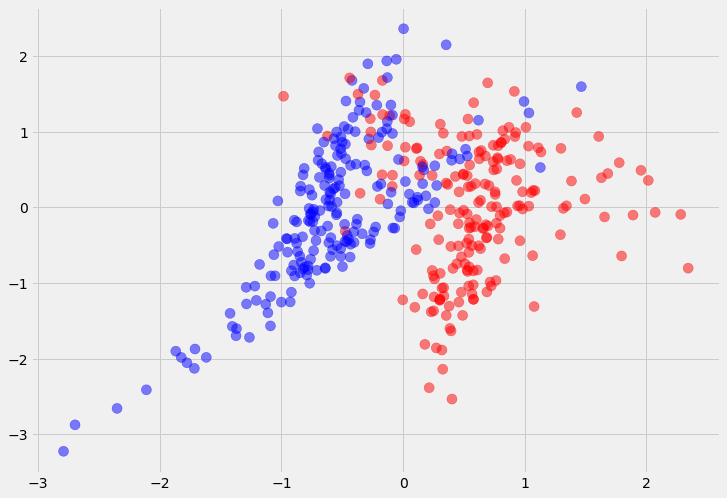

In [11]:

#Generate fake data that is 400 x 2.
data = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, 
                    class_sep=.54, random_state = 8)

df = pd.DataFrame(data[0], columns=["feature1", "feature2"])
#Add target variable to df 
df["target"] = data[1]

#Call scatter plot of feature1 vs feature2 with color-encoded target variable
plt.style.use("fivethirtyeight")
plt.figure(figsize=(11, 8))
#Color encode target variable
colors = df.target.map({0:"b", 1:"r"})
plt.scatter(df.feature1, df.feature2, c = colors, s = 100, alpha=.5);

In [12]:
df.head()

,feature1,feature2,target
0,-0.773005,-0.012956,0
1,0.755748,0.205865,1
2,-0.500822,0.863660,0
3,1.034189,1.249187,0
4,0.230570,-1.379809,1


In [13]:
#Assign X and y
X = df.drop('target', axis=1)
y = df['target']

#Fit a Decision Tree model with max_depth = 2 on the data.

dt = DecisionTreeClassifier(max_depth=2)

dt.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
#Decision boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4, s = 50)
    

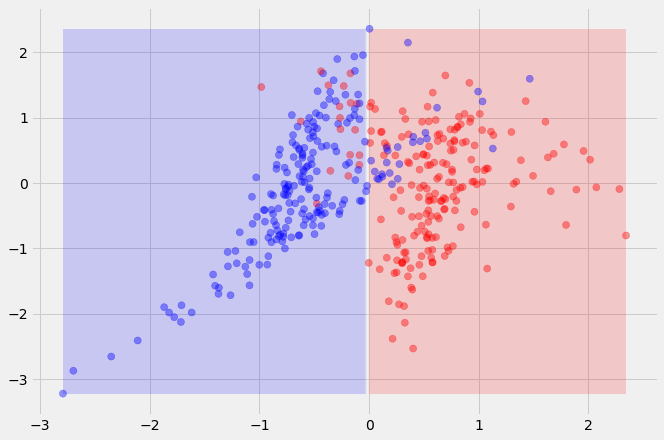

In [15]:
#Feed dt model, features and colors

colors = y.map({0:'b', 1:'r'})
plot_decision_boundary(dt, X.values, colors)

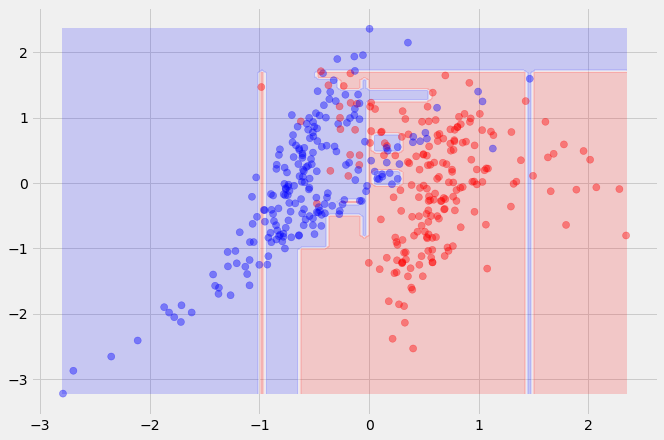

In [16]:
#Train AdaBoost model on the same data and visualize it

#Intialize AdaBoost model with 20 estimators
ada = AdaBoostClassifier(n_estimators=50)

#Fit model

ada.fit(X,y)

#Visualize model boundaries
plot_decision_boundary(ada, X.values, colors)

#Question: is depth a variable here or is it always 1? 

## <b> Using Spotify data to predict whether or not I will like a song? </b>

<b> Attributes </b>


    Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    
    Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

    Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
    Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    
    Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

    Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

    Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
More information here https://developer.spotify.com/web-api/get-audio-features/

Link to my article about the project: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [17]:
#Import spotify data

spotify = pd.read_csv("../../data/spotify_data.csv", index_col=[0])
spotify.head()

,acousticness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0.678,0.512000,0.904,0.561,1


Compare and contrast Decision Trees and AdaBoost

In [18]:

#Intialize AdaBoost with 300 estimators
ada = AdaBoostClassifier(n_estimators=300)

In [19]:
#Assign X and y

X = spotify.drop('target', axis=1)

y = spotify['target']

In [20]:
#Null accuracy
y.value_counts(normalize=True)


1    0.505702
0    0.494298
Name: target, dtype: float64

In [21]:
#Train test split with random state = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 20)

In [22]:
#Fit Ada boost model on training data and score it on testing

ada.fit(X_train, y_train)
ada.score(X_train, y_train)



0.7731481481481481

In [23]:
ada.score(X_test, y_test)

#some overfitting, because train score is better than test score. 
#score isn't great compared to null acuracy 14% above, okay. 

0.6396039603960396

Cross validate 

In [24]:
#could be bias in train test split, so should cross validate.

cross_val_score(ada,X,y,cv=5, scoring='accuracy').mean()

#gets similar score to training set. 

0.6306463897010047

Cross validation shows AdaBoost is a decent but not great model.

Perhaps we chose the wrong estimator value.

Let's make a validation curve to determine the best value for the estimator.

<br>

This will take a while.

In [25]:
#We're going to time our code

#Import time tool
from time import time

In [26]:
#Intialize time variable
t = time()

#Create list of estimator values
estimators = range(50, 1050, 100)

#Intialize cross validation scores list
cv_scores=[]
#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClassifier(n_estimators = est)
    score = cross_val_score(model, X, y, cv=5, scoring = 'accuracy').mean()
    cv_scores.append(score)
    
#Print difference in time

print (time() - t)

85.9788599014


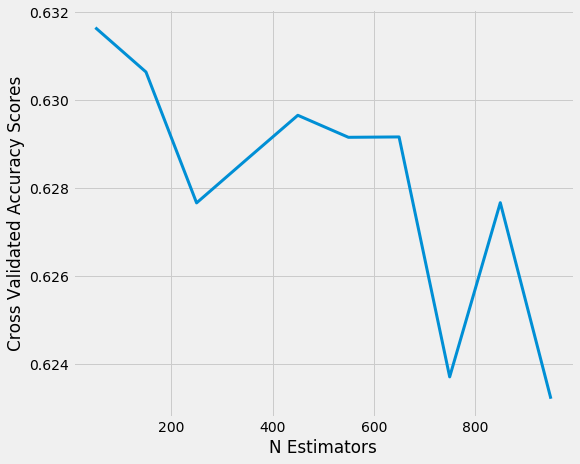

In [27]:
    
#Plot estimators versus scores

plt.figure(figsize= (8, 7))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

#the simplest model is the best one. 

In [28]:
#Derive best estimator value
sorted(zip(cv_scores, estimators), reverse=True)

[(0.6316549148711397, 50),
 (0.6306451612903226, 150),
 (0.6296599759231507, 450),
 (0.6291673832395646, 650),
 (0.6291587843647888, 550),
 (0.6286661916812027, 350),
 (0.6276711790285728, 850),
 (0.6276662653858438, 250),
 (0.6237070977569221, 750),
 (0.6232095914306071, 950)]

## Classification Model Evaluation Techniques

![s](http://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

Source: Data Schoool

**True Positives (TP):** Number of correct positive predictions

**True Negatives (TN):** Number of correct negative predictions

**False Positives (FP):** Number incorrect positive predictions

**False Negatives (FN):** Number of incorrect negative predictions

**Recall aka sensitivity aka the True Positive Rate:** The number of correct positive predictions divided by number of positive instances

**Precision:** The number of correct positive predictions divided by number of positive predictions

**False Positive Rate aka Fall Out:** The number of incorrect positive predictions divided by number of negative instances

**True Negative Rate aka Specificity:** The number of correct negative predictions divided by number of negative instances 

Formula table:
![a](http://www.chioka.in/wp-content/uploads/2013/08/Metrics-Table.png)

Confusion matrix with metrics:

![s](https://eus-www.sway-cdn.com/s/4YEmvTlyess2YF1M/images/VfcIF1yrYJrvLl?quality=1071&allowAnimation=true)

Super confusion matrix:
![q](https://image.ibb.co/bXkGxm/Screen_Shot_2017_11_28_at_12_03_48_PM.png)

Source: Wikipedia

Think about how these metrics can tell us more about the efficacy of a model as opposed to accuracy score.

Is one metrics more useful than others? In which context would it make sense to evaluate a model based on FPR vs FNR?

In [29]:
#Train an Adaboost model with 50 estimators and make predictions using test set

model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [30]:
#Null accuracy of y_test
y_test.value_counts(normalize=True)

#train test split will have diff null accuracy

1    0.536634
0    0.463366
Name: target, dtype: float64

In [31]:
#Pass the predictions and y_test into a confusion matrix
cm = confusion_matrix(y_test,preds)
cm

array([[165,  69],
       [ 90, 181]])

In [32]:
pd.crosstab(y_test,preds)

#true negative is 165
#bottom left, 90 good songs, incorrectly identified as bad songs. 

col_0,0,1
target,,
0,165,69
1,90,181


Let's try calculating the TPR, TNR, FPR, and FNR rates manually

In [33]:
#TPR
cm[1,1]/float(cm.sum(axis=1)[1])

0.6678966789667896

In [34]:
#TNR
cm[0,0]/float(cm.sum(axis=1)[0])

0.7051282051282052

In [35]:
#FPR bad songs that we identified as good 
cm[0,1]/float(cm.sum(axis=1)[0])

0.2948717948717949

In [36]:
#FNR good songs that we missed out on 
cm[1,0]/float(cm.sum(axis=1)[1])

0.33210332103321033

If you were a spotify data scientist would you want a model that produces more false negatives or false positives?

In [37]:
#Calculate precision and recall scores with sklearn
ps = precision_score(y_test,preds)
rs = recall_score(y_test,preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps, rs))

#recall is the TPR above. 

The precision score is 0.72 and the recall score is 0.67


Cross validate with precision and recall

In [38]:
#Precision
cross_val_score(model,X,y,cv=5, scoring='precision').mean()

cross_val_score(model,X,y,cv=5, scoring='recall').mean()
#make sure labels say 1 or 0 

0.6470588235294118

In [39]:
#Recall


![w](https://chrisalbon.com/images/machine_learning_flashcards/Receiver_Operating_Characteristic_print.png)

ROC (receiver operating characteristic) curve is a commonly used way to visualize the performance of a binary classifier.

AUC (area under curve) is arguably the best way to summarize a model performance's in a single number.

In [40]:
#Derive probabilities of class 1 from the test set
test_probs = model.predict_proba(X_test)[:,1]
#proba gives you 2 column numpy array. left is class 0, right is class 1

#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

In [41]:
thres[::5]

array([0.67395025, 0.51727539, 0.51485767, 0.51270979, 0.51047345,
       0.50932908, 0.50832832, 0.50760983, 0.5071586 , 0.50643112,
       0.50576681, 0.50554432, 0.50525943, 0.50406749, 0.50334189,
       0.5030548 , 0.50261017, 0.50217822, 0.50132511, 0.50082492,
       0.50050943, 0.50017328, 0.50004778, 0.49936235, 0.49899682,
       0.49849238, 0.49784518, 0.49711748, 0.49673251, 0.49617644,
       0.49551658, 0.49522865, 0.49494945, 0.49475385, 0.49417881,
       0.49354574, 0.49311843, 0.49243828, 0.49045695, 0.48877836,
       0.43393518, 0.42814894])

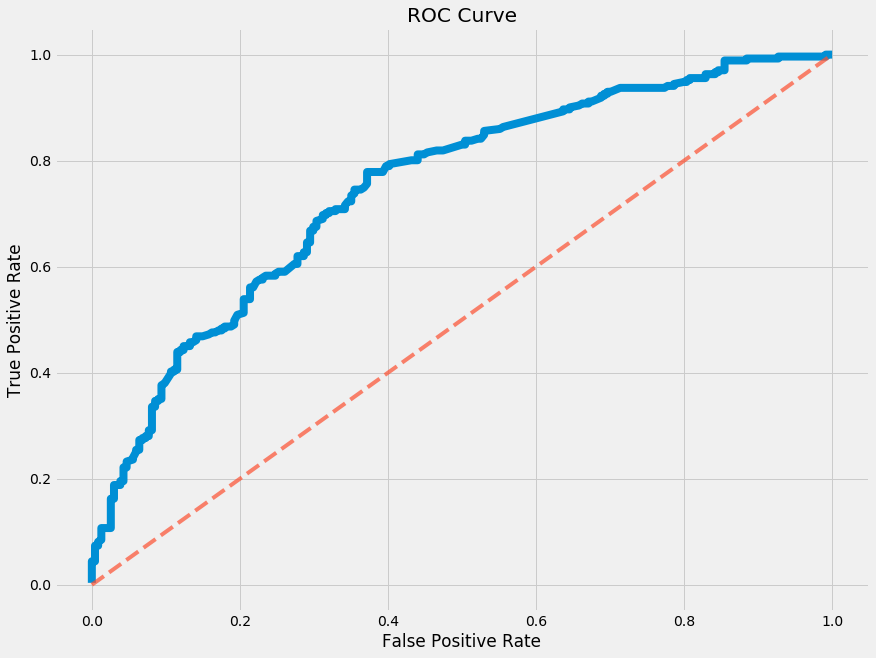

In [42]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


#want curve to be as close to the left and right as possibel. ROC is area between curve.
#want to max profit. LINE IS RANDOM MODEL. random curve will give 

How do you rate this model?

In [43]:

#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

#not area between model and .5 which is random. the area between the right and bottom. 
#.5 is RANDOM. 

0.748091903995963

In [44]:
#Cross validated roc_auc score
cross_val_score(AdaBoostClassifier(n_estimators=50,algorithm='SAMME'), X,y,cv = 5,
                                  scoring='roc_auc').mean()


0.6592541506552371

Plotting threshold vs FPR/TPR on the same plot

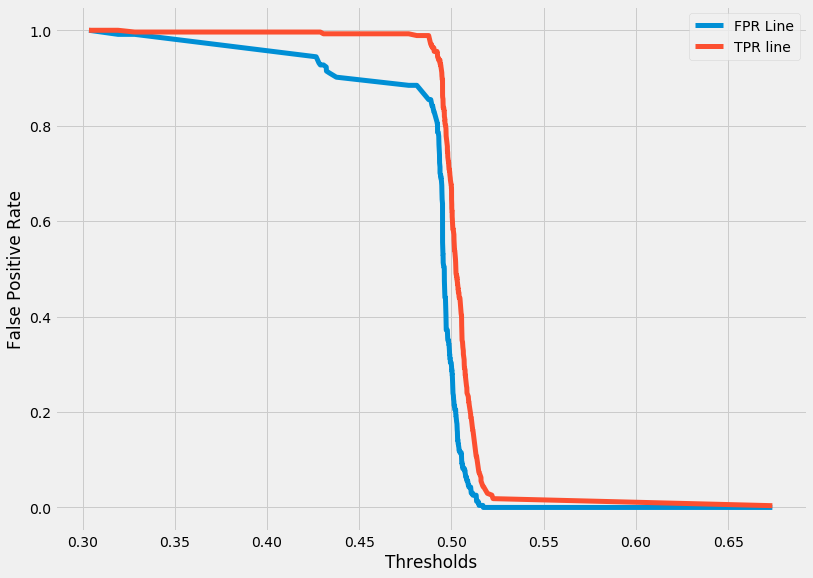

In [45]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

What do you see here? Why are is there a negative correlation in both lines?

## Advanced Sklearn tools

Overview:

- Grid search
- Pipelining
- Imputation
- Feature unions
- Feature selections

In [46]:
#More imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Gridsearch

Algorithm that tests every combination of model parameters to find the best one.

Let's use GridSearch to find the best K value for a KNN model and Spotify data

In [47]:
#Intialize parameter grid

#Range of neighbors to test
neighbors_range = range(1,21,2)

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn['n_neighbors'] = neighbors_range

param_grid_knn

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

In [48]:
#Intialize Grid

grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid = param_grid_knn, cv = 5, scoring = 'accuracy')

#Fit grid on data

grid_knn.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [49]:
#Scores
grid_knn.grid_scores_

[mean: 0.56668, std: 0.03445, params: {'n_neighbors': 1},
 mean: 0.58404, std: 0.04995, params: {'n_neighbors': 3},
 mean: 0.58007, std: 0.05479, params: {'n_neighbors': 5},
 mean: 0.57759, std: 0.05078, params: {'n_neighbors': 7},
 mean: 0.58999, std: 0.05879, params: {'n_neighbors': 9},
 mean: 0.60337, std: 0.06452, params: {'n_neighbors': 11},
 mean: 0.59891, std: 0.05833, params: {'n_neighbors': 13},
 mean: 0.60089, std: 0.05880, params: {'n_neighbors': 15},
 mean: 0.59841, std: 0.05767, params: {'n_neighbors': 17},
 mean: 0.60139, std: 0.05741, params: {'n_neighbors': 19}]

In [50]:
#Whats the best cross validated accuracy score

grid_knn.best_score_

0.6033713435795737

In [51]:
#Find the best parameters
grid_knn.best_params_

{'n_neighbors': 11}

This simple technique gives us the best K value.

We can use the best model from grid_knn to make predictions.

In [52]:
#Input 
x = [[0.2, .15, 0.68, 0.05, 0.328]]

#Make prediction 
grid_knn.predict(x)

array([1])

In [53]:
#Get probability
grid_knn.predict_proba(x)

array([[0.18181818, 0.81818182]])

Quick exercise:
<br>
Use grid search to determine the best depth value in a decision tree. Use depths from 2 - 20.

In [54]:


#Range of neighbors to test
depths_range = range(2,20)

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt['max_depth'] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

The CV in GridSearchCV stands for cross validation which means we have to set a cv and scoring value.

In [55]:
#Intialize Grid

grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                      param_grid= param_grid_dt, cv=5, scoring='accuracy')

#Fit grid on data

grid_dt.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [56]:
#Best score for DT model
grid_dt.best_score_

0.6608824987605354

In [57]:
#Best parameter for DT model
grid_dt.best_params_

{'max_depth': 4}

In [58]:
#Make prediction

grid_dt.best_params_

{'max_depth': 4}

In [59]:
grid_dt.predict(x)

array([1])

So far our grids have been one-dimensional, now let's try using multiple dimensions

In [60]:
#Param grid with test different split criteria as well.
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}

param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

It's going to cross-validate every combination between the criterion parameters and depth parameters.

In [61]:
#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [62]:
#Best parameter

grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [63]:
#Best score

grid_dt.best_score_

0.6608824987605354

How many models did this grid search function conduct?

Let's add in some parameters

In [64]:

param_grid_dt["min_samples_split"] =[2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5]

In [65]:
#Intialize Grid
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = param_grid_dt,
                      cv = 5, scoring = 'accuracy')

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X, y)

#Print time difference

print (time() - t)

18.7155301571


In [66]:
#Best parameter

grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 2}

In [67]:
#Best score

grid_dt.best_score_

0.6826970748636589

In [68]:
#Make prediction

grid_dt.predict(x)

array([1])

Obviously grid search takes a long time and in some case can cause memory errors. This is where RandomizedSearchCV comes in.

In [69]:
#Import 
from sklearn.grid_search import RandomizedSearchCV

Functions just like GridSearchCV, except we have to choose a value n_iter which is the random number of combinations we testing and set param_distributions instead of param_grid.

In [70]:
#Intialize RandomizedSearchCV grid with n_iter = 20
grid_dt = RandomizedSearchCV(estimator= DecisionTreeClassifier(), n_iter = 20,
                            param_distributions = param_grid_dt, cv = 5, scoring = 'accuracy')

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X,y)

#Print time difference

print (time() - t)

0.725666999817


Reduced run time by a huge percentage!

But now let's see if we sacrificed performance.

In [71]:
#Check best score

grid_dt.best_score_

0.6514625681705504

### Pipelines

Let's go back to using the KNN model.


We know that we need to scale our data for the KNN algorithm right?

In [72]:
#Scale data and fit it a Grid search function it.

#Intialize scalar
scale = StandardScaler()

#Fit and transform scaler on the data
#scale data, mean is 0, std is 1. if income is 10k-100k, but college education is 14-16%
Xs = scale.fit_transform(X)

In [73]:
#Intialize Grid

grid_knn_s = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on scaled data

grid_knn_s.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
#Best score
grid_knn_s.best_score_

0.6043629152206247

In [75]:
#Best K value
grid_knn_s.best_params_

{'n_neighbors': 17}

In [76]:
#Make prediction

#First transform predict using scaler

xs = 

#Pass in xs to grid model



SyntaxError: invalid syntax (<ipython-input-76-1fbc4d5eeb05>, line 5)

Time to make a pipeline.

In [ ]:
#Pass scaler and knn classifier objects into make_pipeline function
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
#Create new param_grid
neighbors_range = range(2, 21)
param_grid_knn = {}
param_grid_knn["kneighborsclassifier__n_neighbors"] = neighbors_range
#param_grid_knn

In [ ]:

#Pass in pipe into GridSearchCV function, 
grid_knn_pipe = GridSearchCV(pipe, param_grid=param_grid_knn, cv=5, scoring='accuracy')

#Fit on original versions of data
grid_knn_pipe.fit(X, y)

#Best scores and params
print grid_knn_pipe.best_score_, grid_knn_pipe.best_params_

You can also pass in the pipe object into a cross_val_score function

In [ ]:
# Use the cross-validation process using Pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

Class exercise: Use grid search to model the 2016 Democratic primary data with the person who is next to you at your table. 

In [ ]:
#Load in data files
primary = pd.read_csv("../../data/primary_data//primary_results.csv")
county = pd.read_csv("../../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../../data/primary_data/county_facts_dictionary.csv")

subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

county = county.iloc[:,subset_col_index].copy()

subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

col_dict = dict(zip(county.columns, subset_cols))
#Use dictionary to rename the columns
county.rename(columns=col_dict, inplace=True)
primary.dropna(inplace=True)
bern = primary[primary.candidate== "Bernie Sanders"]
hill = primary[primary.candidate== "Hillary Clinton"]
bern = bern[["fips", "candidate", "votes"]]
dem = pd.merge(hill, bern, on="fips")
dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace=True)
dem["winner"] = dem.clinton_votes - dem.sanders_votes
def vote_winner(x):
    if x >0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"
    
dem["winner"] = dem.winner.apply(vote_winner)

dem = dem[dem.winner!= "TIE"]
dem = dem[["fips", "winner"]]
df = pd.merge(county, dem, on="fips")
df.set_index("fips", inplace=True)
df.head()

In [ ]:
#Answer



Now let's make a pipeline using regression

In [ ]:
#Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
#Load in boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

In [ ]:
boston["DESCR"].split("\n")

In [ ]:
#Assign X and y

X = df.drop("MEDV", axis =1)
y = df.MEDV

In [ ]:
#Use a Pipeline Class instead of function to establish pipeline
pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                            ('linearregression', LinearRegression())])

In [ ]:
#Select a few features from X
XX = X[["RM", "DIS", "NOX", "CRIM"]].copy()

In [ ]:
#Intialize range values for poly
poly_range = [1, 2, 3, 4, 5, 6, 7]

#Intialize grid dictionary
param_grid_poly = {}

#Input grid values
param_grid_poly["polynomialfeatures__degree"] = poly_range

#Establish the grid
poly_grid = GridSearchCV(pipe_poly, 
                         param_grid = param_grid_poly, cv=5, 
                         scoring='neg_mean_squared_error')

In [ ]:
# Fit on data

poly_grid.fit(XX, y)

In [ ]:
poly_grid.best_params_

In [ ]:
poly_grid.best_score_

Randomized Grid Search with Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                            ('ridgeregression', Ridge())]) 

param_grid_ridge = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
              'ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = RandomizedSearchCV(pipe_poly, param_distributions=param_grid_ridge, 
                                n_iter = 10 , cv = 5, scoring='neg_mean_squared_error')
grid_ridge.fit(XX, y)

In [ ]:
print (grid_ridge.best_params_, grid_ridge.best_score_)

In [ ]:
#beat original score of -MSE of -32. 

## Resources

<b> Boosting: </b>

- https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

- https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

- http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

- https://www.youtube.com/watch?v=Rm6s6gmLTdg&list=PLaslQpv_LmSKxSCBPdKWEI7lLHrTCeewl

- https://www.coursera.org/learn/practical-machine-learning/lecture/9mGzA/boosting

<b> Grid Search and Pipelines </b>

- https://chrisalbon.com/machine-learning/cross_validation_parameter_tuning_grid_search.html
- https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://chrisalbon.com/machine-learning/pipelines_with_parameter_optimization.html
- https://chrisalbon.com/machine-learning/hyperparameter_tuning_using_random_search.html
- https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/
- https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/


Evalution:
- http://www.dataschool.io/roc-curves-and-auc-explained/
- http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf




# In class work.

Choose one of the following dataset to work on modeling for the rest of class using the new models and tools we've learned in the past couple weeks.

<br>
Spotify, Dem Primary, KC Housing, Movie Metadata, HR Employee, Breast Cancer, Default, Mushrooms, Red win quality, Zillow starter, or Pokemon.